### Libraries

In [5]:
#importing basic libraries

import numpy as np
import pandas as pd

#importing libraries for data visualizations

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2555933 sha256=e681dd70558f2dac5168f071e7bf87e9423f6dac460f568e5e38629ec332eaf6
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [1]:
#importing libraries for rec sys

from surprise.prediction_algorithms.matrix_factorization import SVD
from collections import defaultdict

from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

installing numpy specific version to handle surprise better and avoid error.

In [6]:
!pip uninstall numpy -y

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0


In [7]:
!pip install numpy==1.26.0

  Using cached numpy-1.26.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.0 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.0 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.0 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
music21 9.9.1 requires numpy>=1.26.4, but

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the data

In [6]:
users = pd.read_csv('/content/drive/MyDrive/Users.csv')
rating = pd.read_csv('/content/drive/MyDrive/Ratings.csv')
books = pd.read_csv('/content/drive/MyDrive/Books.csv')

### Exploring the data

In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
#merging book and rating table for simplicity

df = pd.merge(rating, books.drop_duplicates(['ISBN']), on = 'ISBN', how = 'left')
#dropping the image columns as not needed
df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis = 1, inplace=True)

df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


In [10]:
#renaming for simplicity

df.rename(columns = {'User-ID':'user_id', 'Book-Rating': 'rating', 'ISBN': 'book_id'}, inplace=True)
df.head()

,user_id,book_id,rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


In [11]:
#lets see df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1149780 non-null  int64 
 1   book_id              1149780 non-null  object
 2   rating               1149780 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
dtypes: int64(2), object(5)
memory usage: 61.4+ MB


In [12]:
#converting book_id to str

df['book_id'] = df['book_id'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1149780 non-null  int64 
 1   book_id              1149780 non-null  object
 2   rating               1149780 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
dtypes: int64(2), object(5)
memory usage: 61.4+ MB


<Axes: xlabel='rating', ylabel='count'>

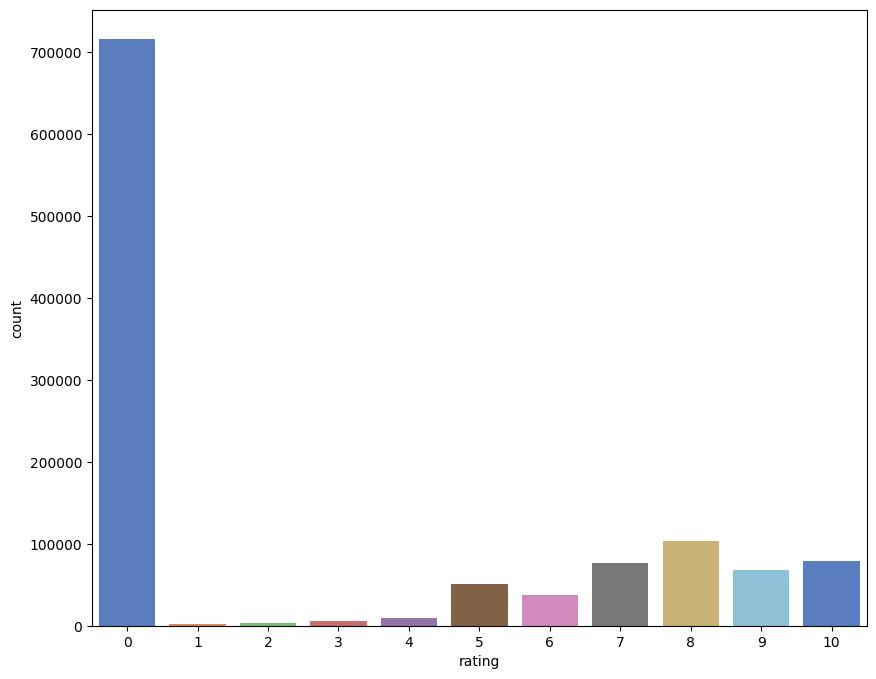

In [ ]:
#ratings plot
plt.figure(figsize= (10,8))
sns.countplot(data=df, x = 'rating', palette='muted')

clearly the rating 0 has more values in it because its most likely to be missing as no one can give 0 rating, because the scale is 1 to 10. So to remove the bias from the system, and avoid mislearning, every 0 rating column is dropped

In [13]:
df.drop(df.index[df['rating']== 0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              433671 non-null  int64 
 1   book_id              433671 non-null  object
 2   rating               433671 non-null  int64 
 3   Book-Title           383842 non-null  object
 4   Book-Author          383840 non-null  object
 5   Year-Of-Publication  383842 non-null  object
 6   Publisher            383840 non-null  object
dtypes: int64(2), object(5)
memory usage: 26.5+ MB


We have 433671 ratings

<Axes: xlabel='rating', ylabel='count'>

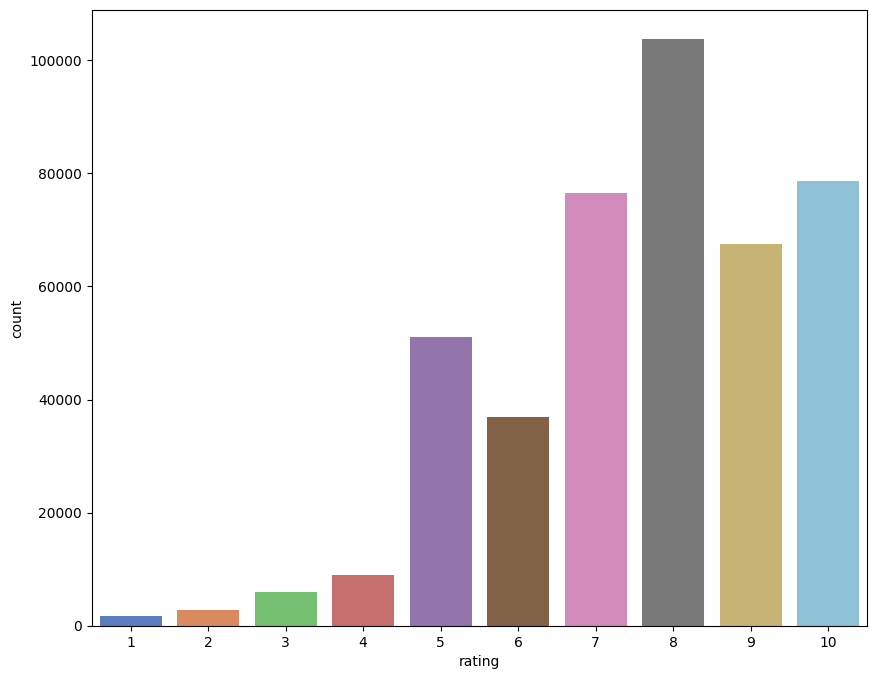

In [ ]:
#plotting again

plt.figure(figsize= (10,8))
sns.countplot(data=df, x= 'rating', palette='muted')

So it can be seen that most ratings are positive, since the distribution is right skewed. Most books are rated 8 folowed by 10 and 9.

In [14]:
# total number of unique users

df['user_id'].nunique()

77805

In [15]:
# total no of unique books

df['book_id'].nunique()

185973

So we should have 77805*185973 ratings total, but we only have 433671, which means many users haven't read all books. So the system can recommend to them after learning their preferences.

In [16]:
df.groupby(['user_id', 'book_id']).count()['rating'].sum()

433671

The sum is equal to the total number of observations, which implies that there is only one interaction between a book and a user. Which makes sense as ratings are only given by the user one time.

In [17]:
#finding out the most rated book
df['book_id'].value_counts()


,count
book_id,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
...,...
0140441905,1
0886777267,1
0671697951,1


<Axes: xlabel='rating', ylabel='count'>

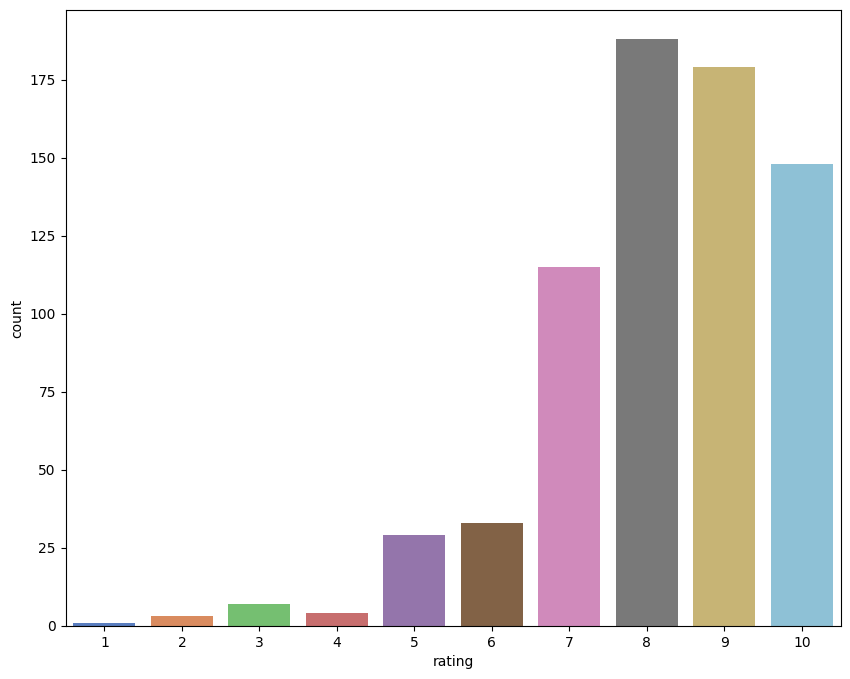

In [ ]:
# plot the ratings of book_id 0316666343

plt.figure(figsize= (10,8))
sns.countplot(data=df[df['book_id'] == '0316666343'], x= 'rating', palette = 'muted')

In [ ]:
#finding out the most interactive user

df['user_id'].value_counts()

,count
user_id,
11676,8524
98391,5802
153662,1969
189835,1906
23902,1395
...,...
114079,1
114081,1
114096,1


so `user_id` 11676 has read 8524 books, but we still have 185973 - 8524 books to recommend to this user. Our rec sys will aim for that.

### Data preprocessing

In [18]:
''' Since the data has many entries, to make it less computationally extensive,
we can reduce the dataset by removing books that have less or no ratings and users that have given less or no ratings.
To easily build the model and prevent bad recommendations due to limited prior information.
So we set a logical cutoff for ratings i.e if the user has given less than 50 ratings we will not use them for building the model.
And books which have atleast 10 ratings will be considered'''

USER_CUTOFF = 50

# Get the column containing the users
users = df.user_id
# Create a dictionary from users to find their number of books
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [19]:
# We want our users to have at least 50 ratings to be considered

remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < USER_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)] # '~' means select all that and not include it in final df

In [20]:
df.shape #as we can see it has significantly reduced from 477631 to 175023

(175023, 7)

In [21]:
# doing same for books

books = df.book_id
ratings_count = dict()
for book in books:
    if book in ratings_count:
      ratings_count[book] += 1
    else:
      ratings_count[book] = 1

In [22]:
BOOKS_CUTOFF = 10
remove_books = []
for book, num_ratings in ratings_count.items():
    if num_ratings < BOOKS_CUTOFF:
      remove_books.append(book)
df = df.loc[~df.book_id.isin(remove_books)]

In [23]:
df.shape

(26698, 7)

## Building Recommendation system

In this notebook, 4 approaches are made to build a system. In industry a hybrid verison of some/all of these below approaches is used.

* Rank-based Rec Sys: Popularity based recommendation system, best used to tackle `cold-start-problem`.
* User based collaborative filtering
* Item based collaborative filtering
* Matrix factorization: SVD

### Rank-Based Rec Sys

In [24]:
''' First step is to calculate the average for all users' ratings per book
    To build the rank-based recommendation system, we take average of all the ratings provided to each book and then rank them based on their average rating.
'''

#what's the average rating of each book

avg_rating = df.groupby('book_id')['rating'].mean()
avg_rating


,rating
book_id,
0020442203,8.727273
002542730X,7.428571
0028604199,8.000000
0060002050,7.800000
006000438X,7.666667
...,...
1573229725,9.117647
1576737330,7.437500
1592400876,8.840000


In [ ]:
#next, how many ratings are given to that book

rating_count = df.groupby('book_id')['rating'].count()

#merging it with previous and creating new dataframe called "final_rating"

final_rating = pd.DataFrame({
    'avg_rating': avg_rating,
    'rating_count': rating_count
})
final_rating

,avg_rating,rating_count
book_id,,
0020442203,8.727273,11
002542730X,7.428571,28
0028604199,8.000000,10
0060002050,7.800000,10
006000438X,7.666667,15
...,...,...
1573229725,9.117647,17
1576737330,7.437500,16
1592400876,8.840000,25


In [ ]:
max = final_rating['rating_count'].max()
max

145

In [ ]:
final_rating['rating_count'].sort_values(ascending=False)

,rating_count
book_id,
0316666343,145
0385504209,106
059035342X,90
0679781587,85
043935806X,84
...,...
0440225817,10
044022330X,10
0440207770,10


In [25]:
'''
So we can see that what is the average rating of a book and how many users have rated it.
We also see the max and order of interactions. To build a reccomendation systems based on popularity
we design a funciton that only recommends the top n books, lets put threshold on that so
by default the book should have minimum 80 interactions (rating) for it
'''

def top_n_books(data, n, min_inter = 80):

  #books with atleast min_inter interactions
  recs = data[data['rating_count']> min_inter]
  # sorting them to give top n
  recs = recs.sort_values(by='avg_rating', ascending=False)

  return recs.index[:n]



In [ ]:
# We can use this function with different n's and minimum interactions to get books to recommend.

#top 10 books to recommend to new user

top_10 = top_n_books(final_rating, 10)
top_10

Index(['059035342X', '043935806X', '0679781587', '0385504209', '0312195516',
       '0316666343'],
      dtype='object', name='book_id')

In [ ]:
# to see the title of the books, and not book_ids.
name_of_books = []
for i in top_10:
    name_of_books.append(df[df['book_id']== str(i) ]['Book-Title'].unique()[0])
name_of_books

["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 nan,
 'The Da Vinci Code',
 'The Red Tent (Bestselling Backlist)',
 'The Lovely Bones: A Novel']

So only 6 books met the min_inter condition to be recommended in top 10

In [ ]:
# top 10 but with not 50 but 20 intercations

top_10_20 = top_n_books(final_rating, 10, 20)

name_of_books = []
for i in top_10_20:
    name_of_books.append(df[df['book_id']== str(i) ]['Book-Title'].unique()[0])
name_of_books

['Seabiscuit: An American Legend',
 "Charlotte's Web (Trophy Newbery)",
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Griffin &amp; Sabine: An Extraordinary Correspondence',
 "The Princess Bride: S Morgenstern's Classic Tale of True Love and High Adventure",
 'Gone with the Wind',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'The Two Towers (The Lord of the Rings, Part 2)',
 'A Wrinkle in Time']

So now we have a full 10 for top 10 recommendations. Lets see for top 3 and min_inter = 100 to get the all time fav books

In [ ]:
# top 3 but with not 50 but 100 intercations

top_3 = top_n_books(final_rating, 3, 100)

name_of_books = []
for i in top_3:
    name_of_books.append(df[df['book_id']== str(i) ]['Book-Title'].unique()[0])
name_of_books

['The Da Vinci Code', 'The Lovely Bones: A Novel']

So `The Da Vinci Code` and `The Lovely Bones: A Novel` are all time popular books that can be recommended to a new user.

### User collaborative filtering

In [26]:
'''
false negatives in recommendation systems are basically, items that should have
been recommended to the user but the system didn't
false positives in context of rec sys are those items which were recommended but
weren't to the prefrence of the target user.
With false negative and false positives, we can calculate precision and recal at
a given value 'k' which is the top k recommendation given by the system.
'''
#libraries specific to recommendation systems

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV
# For splitting the rating data in train and test dataset
from surprise.model_selection import train_test_split
# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

In [27]:
'''
The following function takes the recommendation model as input and gives the precision@k and recall@k for that model.
To compute precision and recall, top k predictions are taken under consideration for each user.
'''
def precision_recall_at_k(model, k=10, threshold=7):

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions is calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    # Mean of all the predicted recalls is calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) # Command to print the overall precision
    print('Recall: ', recall) # Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [28]:
# encoding the user_id and book_id for simplicity, as to not deal with 6-7 digit ids'

from sklearn.preprocessing import LabelEncoder
data=df[['user_id','book_id']].apply(LabelEncoder().fit_transform)
data['rating']=df['rating']
data.head()

,user_id,book_id,rating
1211,1251,521,9
1213,1251,524,9
1214,1251,525,8
1456,1252,1,10
1474,1252,52,9


In [29]:
df_rating = data.copy()

In [30]:
# Updating the final_rating dataframe with the new encoded book_id count and average of ratings based on the new dataframe
average_rating = data.groupby('book_id')['rating'].mean()
count_rating = data.groupby('book_id')['rating'].count()

final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})
final_rating.head()

,avg_rating,rating_count
book_id,,
0,8.727273,11
1,7.428571,28
2,8.000000,10
3,7.800000,10
4,7.666667,15


Loading the dataset again in surprise's `DatasetAutoFolds` form which is required by this library. `Reader`and `Dataset` classes are used

In [31]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 10))

# Loading the rating dataset
data = Dataset.load_from_df(data[['user_id', 'book_id', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

In [32]:
# USER - Based Collaborative filtering recommendation system

#similarity options:

sim_options = {
    'name': 'cosine',
    'user_based': True
}

knn_user = KNNBasic(sim_options = sim_options, verbose=False)

knn_user.fit(trainset)

precision_recall_at_k(knn_user)

RMSE: 1.8455
Precision:  0.816
Recall:  0.812
F_1 score:  0.814


In [33]:
#Q- What is the predicted rating for the user with userId=1326 and for book_id=12126?
knn_user.predict(1326, 12126, r_ui=8, verbose=True)


user: 1326       item: 12126      r_ui = 8.00   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=12126, r_ui=8, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [34]:
#Q- Predicting the rating for the same userId=1326 but for a book which this user has not a rated before, i.e., book_id=2150

knn_user.predict(1326, 2150, verbose=True)

user: 1326       item: 2150       r_ui = None   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=2150, r_ui=None, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [35]:
#Improving the model by hypertuning it parameters (k, min_k, sim_options). 3-fold cross validation is used
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.7016524810532412
{'k': 20, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': True}}


In [36]:
#Building the model again with these new tuned values
sim_options = {'name': 'msd',
               'user_based': True}

knn_optimized = KNNBasic(sim_options=sim_options, k=20, min_k=6, verbose=False)

# Training the algorithm on the train set
knn_optimized.fit(trainset)

# Let us compute precision@k and recall@k with k=10.
precision_recall_at_k(knn_optimized)

RMSE: 1.6866
Precision:  0.834
Recall:  0.891
F_1 score:  0.862


After tuning hyperparameters, RMSE for the test set has reduced from 1.84 to 1.68.
We can observe that after tuning the hyperparameters, the tuned model's F-1 score increased from 0.81 to 0.86 in comparison to the baseline model.

In [37]:
# Q- What is the predicted rating for the user with user_id=1326 and for book_id=12126 using the tuned user-based collaborative filtering?
knn_optimized.predict(1326, 12126, r_ui=8, verbose=True)

user: 1326       item: 12126      r_ui = 8.00   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=12126, r_ui=8, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [38]:
#predicting rating for the same user_id=1326 but for a book which this user has not a rated before, i.e., book_id=2150.
knn_optimized.predict(1326, 2150, verbose=True)

user: 1326       item: 2150       r_ui = None   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=2150, r_ui=None, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [39]:
#Identifying users similar to a given user (nearest neighbors)
knn_optimized.get_neighbors(1, k=5)

[7, 23, 95, 107, 109]

In [40]:
# Function to recommend the top_n using the optimized KNNB model

def get_recommendations(data, user_id, top_n, algo):

    recommendations = []

    # Creating an user item interactions matrix using the 'pivot'
    user_item_interactions_matrix = data.pivot(index='user_id', columns='book_id', values='rating')

    # Extracting those book ids which the user_id has not interacted with yet
    non_interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the book id which user_id has not interacted with yet
    for book_id in non_interacted_items:

        # Predicting the ratings for those non interacted book ids by this user
        est = algo.predict(user_id, book_id).est

        # Appending the predicted ratings
        recommendations.append((book_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # Returning top n predicted rating items for this user

In [41]:
df_rating=df_rating.drop_duplicates()

In [42]:
#Predicting the top 5 items for userId=1 using the similarity-based recommendation system
recommendations = get_recommendations(df_rating, 1, 5, knn_optimized)

In [43]:
# Building the dataframe for above recommendations with columns "book_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['book_Id', 'predicted_ratings'])

,book_Id,predicted_ratings
0,259,10.000000
1,1297,9.884446
2,658,9.870802
3,639,9.764398
4,451,9.702661


Correcting the rating based on the no of user who have read that book:

While comparing the ratings of two books, it is not only the ratings that describe the likelihood of the user to that book. Along with the rating the number of users who have read that book also becomes a important point to consider

In [44]:
#Function to rank the books based on the number of ratings as well
def ranking_books(recommendations, final_rating):
  # Sort the books based on ratings count
  ranked_books = final_rating.loc[[items[0] for items in recommendations]].sort_values('rating_count', ascending=False)[['rating_count']].reset_index()

  # Merge with the recommended books to get predicted ratings
  ranked_books = ranked_books.merge(pd.DataFrame(recommendations, columns=['book_id', 'predicted_ratings']), on='book_id', how='inner')

  # Rank the books based on corrected ratings
  ranked_books['corrected_ratings'] = ranked_books['predicted_ratings'] - 1 / np.sqrt(ranked_books['rating_count'])

  # Sort the books based on corrected ratings
  ranked_books = ranked_books.sort_values('corrected_ratings', ascending=False)

  return ranked_books




>  In the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some books with ratings 10 and we can't have a rating more than 10 for a book.



In [45]:
# Applying the ranking_books function and sorting it based on corrected ratings
ranking_books(recommendations, final_rating)

,book_id,rating_count,predicted_ratings,corrected_ratings
3,259,31,10.000000,9.820395
0,658,53,9.870802,9.733441
2,1297,35,9.884446,9.715415
1,639,43,9.764398,9.611899
4,451,18,9.702661,9.466959


### Item Based Collaborative Filtering

In [46]:
# Defining similarity measure
sim_options = {'name': 'cosine',
               'user_based': False} #since its items so user_based is set to false

# Defining nearest neighbour algorithm
knn_item = KNNBasic(sim_options=sim_options,verbose=False)

# Train the algorithm on the train set
knn_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k=10
precision_recall_at_k(knn_item)

RMSE: 1.6210
Precision:  0.802
Recall:  0.8
F_1 score:  0.801


We can observe that the baseline model has RMSE=1.62 & F_1 Score=0.80on the test set.
We can try to improve the performance number by using GridSearchCV

In [47]:
# Q- What is the predicted rating for an user with user_id=1326 and for book_id=12126?
knn_item.predict(1326, 12126, r_ui=8, verbose=True)


user: 1326       item: 12126      r_ui = 8.00   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=12126, r_ui=8, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [48]:
knn_item.predict(1326, 2150, verbose=True)

user: 1326       item: 2150       r_ui = None   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=2150, r_ui=None, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

Hyperparameter tuning:

In [49]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10,20,30], 'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

# Fitting the data
grid_obj.fit(data)

# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

In [50]:
# Building the final model with tuned values
# Creating an instance of KNNBasic with optimal hyperparameter values
knn_optimized_item = KNNBasic(sim_options={'name': 'cosine', 'user_based': False}, k=30, min_k=3,verbose=False)

# Training the algorithm on the train set
knn_optimized_item.fit(trainset)

# Let us compute precision@k and recall@k with k=10
precision_recall_at_k(knn_optimized_item)

RMSE: 1.5882
Precision:  0.818
Recall:  0.836
F_1 score:  0.827


We observe that after tuning hyperparameters, RMSE for the test set has reduced to 1.58 from 1.62. F_1 score of the tuned model is also slightly better

In [51]:
# Q- predict the rating for an user with user_id=1326 and for book_id= 12126.
knn_optimized_item.predict(1326, 12126, r_ui=8, verbose=True)

user: 1326       item: 12126      r_ui = 8.00   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=12126, r_ui=8, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [52]:
knn_optimized_item.predict(1326, 2150, verbose=True)

user: 1326       item: 2150       r_ui = None   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=2150, r_ui=None, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

Identifying similar items to a given item (nearest neighbors)

In [53]:
#  finding 5 most similar items to the BookId=1.
knn_optimized_item.get_neighbors(1, k=5)

[11, 12, 17, 21, 22]

In [56]:
recommendations = get_recommendations(df_rating, 1, 5, knn_optimized_item)
recommendations

[(1, 10), (15, 10), (16, 10), (17, 10), (30, 10)]

In [55]:
# Building the dataframe for above recommendations with columns "book_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['book_Id', 'predicted_ratings'])

,book_Id,predicted_ratings
0,1,10
1,15,10
2,16,10
3,17,10
4,30,10


In [57]:
# Applying the ranking_books function and sorting it based on corrected ratings
ranking_books(recommendations, final_rating)

,book_id,rating_count,predicted_ratings,corrected_ratings
0,1,28,10,9.811018
1,15,13,10,9.722650
2,16,13,10,9.722650
3,17,12,10,9.711325
4,30,10,10,9.683772


### Matrix Factorization Model

The model uses matrix factorization method to derive the latent features that are not present in the empirical data but can be inferred from the data.

In [58]:
'''
SVD is used to mathematically implement the idea of Matrix Factorization
from the user-item matrix. SVD doesnt work with missing values in the
matrix
'''
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Let us compute precision@k and recall@k with k=10
precision_recall_at_k(svd)

RMSE: 1.5106
Precision:  0.827
Recall:  0.86
F_1 score:  0.843


We observe that the baseline F_1 score for the matrix factorization model on the test set is higher in comparison to the F_1 score for the user-user similarity-based recommendation system and lower in comparison to the optimized user-user similarity-based recommendation system.

In [59]:
# Q- What is the predicted rating for an user with user_id=1326 and for book_id= 12126?
svd.predict(1326, 12126, r_ui=8, verbose=True)


user: 1326       item: 12126      r_ui = 8.00   est = 7.99   {'was_impossible': False}


Prediction(uid=1326, iid=12126, r_ui=8, est=7.9887628424657535, details={'was_impossible': False})

In [60]:
# Making prediction for user_id 1326 and book_id 2150
svd.predict(1326, 2150, verbose=True)

user: 1326       item: 2150       r_ui = None   est = 7.99   {'was_impossible': False}


Prediction(uid=1326, iid=2150, r_ui=None, est=7.9887628424657535, details={'was_impossible': False})

Conclusion is that for this system, using the USER-USER colaborative filter model is the best option.